<h1 align="center">The Monty Hall Problem</h1>


# Import all Required Libraries.

In [1]:
import random
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Rules

In [2]:
#The host will reveal a door that doesn't contain the prize
#Remember the host knows the door that the prize is behind
def get_non_prize_door(host, num_doors, player_choice):
  i = 1
  while (i == host or i== player_choice ):
    i = (i+1)%(num_doors)
  
  return i

In [3]:
#Let the player switch to the other unopened door
def switch_function(shown_door, num_doors, player_choice):
  i = 1
  while (i == shown_door or i== player_choice ):
    i = (i+1)%(num_doors)
  
  return i

# Game

In [4]:
def monty_hall_game(switch, num_tests):
  win_switch_cnt = 0
  win_no_switch_cnt = 0
  lose_switch_cnt = 0
  lose_no_switch_cnt = 0
  doors = [0,1,2] #Get the doors
  num_doors = len(doors) #Get the number of doors
  
  
  for i in range(0,num_tests):
    door_with_prize = random.randint(0, num_doors-1) #Randomly choose the door with the wanted prize
    host = door_with_prize #The host knows which door has the prize
    #The player chooses initially a random door that s/he believes has the prize
    player_choice = random.randint(0, num_doors-1) 
    original_player_choice = player_choice
    shown_door = get_non_prize_door(host, num_doors, player_choice)
    if switch == True:
      player_choice = switch_function(shown_door,num_doors, player_choice)
    
    if player_choice == host and switch == False:
      #Then the player wins from not switching
      # print('Player Wins (No switch) - The player chose door: ', player_choice,' Original choice: ',original_player_choice ,', Door with prize:', door_with_prize, ', Shown Door: ',shown_door )
      win_no_switch_cnt = win_no_switch_cnt + 1
    elif player_choice == host and switch == True:
      # #Then the player wins from switching
      # print('Player Wins (switch) - The player chose door: ', player_choice,' Original choice: ',original_player_choice , ', Door with prize:', door_with_prize, ', Shown Door: ',shown_door )
      win_switch_cnt = win_switch_cnt +1
    elif player_choice != host and switch == False:
      #The player lost from not switching
      # print('Player Lost (No switch) - The player chose door: ', player_choice,' Original choice: ',original_player_choice , ', Door with prize:', door_with_prize, ', Shown Door: ',shown_door )
      lose_no_switch_cnt = lose_no_switch_cnt + 1
    elif player_choice != host and switch == True:
      #The player lost from switching
      # print('Player Lost (switch) - The player chose door: ', player_choice,' Original choice: ',original_player_choice , ', Door with prize:', door_with_prize, ', Shown Door: ',shown_door )
      lose_switch_cnt = lose_switch_cnt + 1
    else:
       print('SOMETHING IS WRONG')

  return win_no_switch_cnt,win_switch_cnt,lose_no_switch_cnt,lose_switch_cnt, num_tests

# Play the Game

In [5]:
x = monty_hall_game(True, 10)
# print('Win switch %: ', x[1]/ x[4])
# print('Lose switch %: ', x[3]/ x[4])
# print('Win No switch %: ', x[0]/ x[4])
# print('Lose No switch %: ', x[2]/ x[4])

# Simulate the Game (Monte Carlo Simulation)

In [6]:
num_tests = []
win_percentage = []
switch = True
for i in range(1,10001):
  num_tests.append(i) 
  y = monty_hall_game(switch, i) 
  win_percentage.append(y[1]/ y[4])

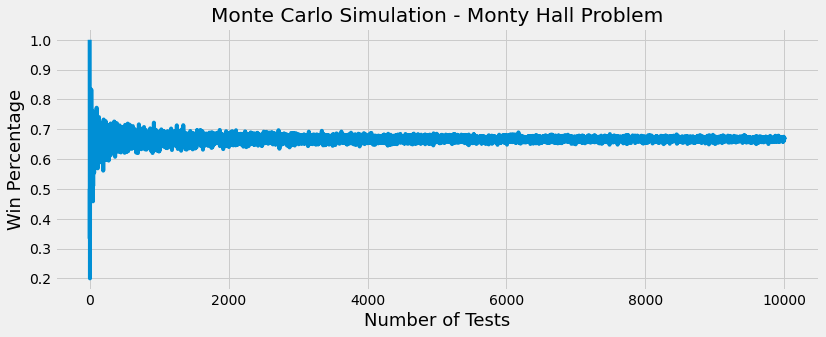

In [10]:
#Visually Show The Number of Tests and the Win Percentage From Switching
plt.figure(figsize=(12.2,4.5)) #width = 12.2in, height = 4.5
plt.plot( num_tests, win_percentage  )
plt.title('Monte Carlo Simulation - Monty Hall Problem')
plt.xlabel('Number of Tests',fontsize=18)
plt.ylabel('Win Percentage',fontsize=18)
plt.show()

In [9]:
print('The simulated win percentage for playing ', y[4], ' games is:' ,y[1]/ y[4])

The simulated win percentage for playing  10000  games is: 0.6685
